In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the procurement data
df = pd.read_csv('procurement_data.csv')
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # convert Date to datetime

In [3]:
print(df.info())
print(df.describe(include='all'))
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   PO Number      500 non-null    object        
 1   Date           500 non-null    datetime64[ns]
 2   Supplier Name  500 non-null    object        
 3   Category       500 non-null    object        
 4   Sub-Category   500 non-null    object        
 5   Item           500 non-null    object        
 6   Quantity       500 non-null    int64         
 7   Unit Price     500 non-null    float64       
 8   Total Cost     500 non-null    float64       
 9   Payment Terms  500 non-null    object        
 10  Region         500 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 43.1+ KB
None
       PO Number                        Date Supplier Name       Category  \
count        500                         500           500          

In [4]:
#Total Spend
total_spend = df['Total Cost'].sum()
print(f"Total Procurement Spend: {total_spend:,.2f}")

Total Procurement Spend: 62,686,175.62


In [5]:
#SPEND BY SUPPLIER
spend_by_supplier = df.groupby('Supplier Name')['Total Cost'].sum().sort_values(ascending=False)
print(spend_by_supplier)


Supplier Name
Delta Industrial    8987760.19
MRO World           8743011.75
Fastenal            8192566.55
LMN Supplies        8065705.38
ABC Traders         8052824.83
Global Metals       7078057.35
Prime Packaging     6959139.32
XYZ Corp            6607110.25
Name: Total Cost, dtype: float64


In [6]:
#SPEND BY CATEGORY
spend_by_category = df.groupby('Category')['Total Cost'].sum().sort_values(ascending=False)
print(spend_by_category)


Category
Raw Materials    17407184.61
MRO              16048832.19
Packaging        15189593.01
Services         14040565.81
Name: Total Cost, dtype: float64


In [8]:
#SPEND BY REGION
spend_by_region = df.groupby('Region')['Total Cost'].sum().sort_values(ascending=False)
print(spend_by_region)


Region
North    19911273.53
East     16411626.58
West     14473611.44
South    11889664.07
Name: Total Cost, dtype: float64


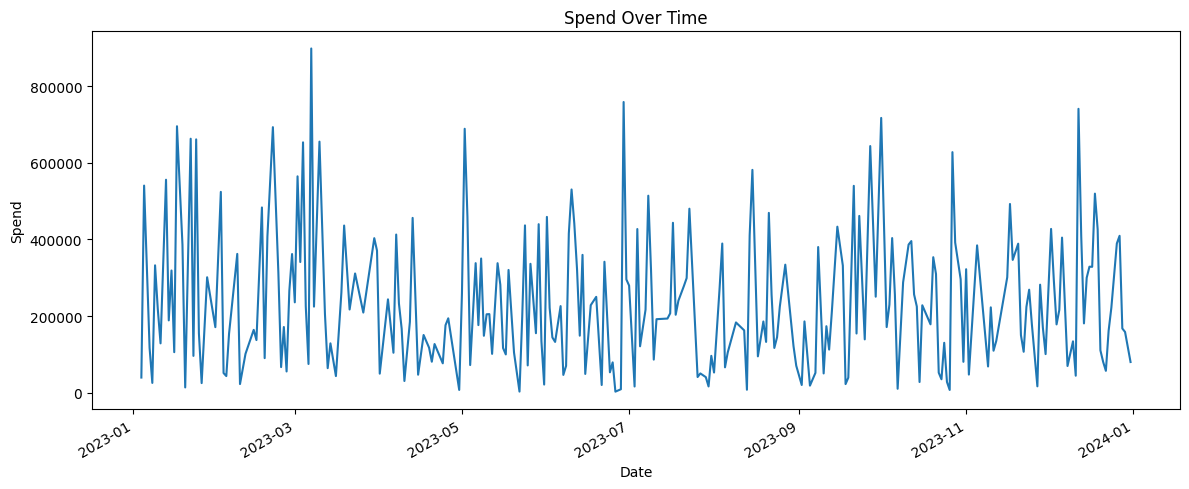

In [9]:
#Spend over time
spend_over_time = df.groupby('Date')['Total Cost'].sum()
spend_over_time.plot(figsize=(12,5), title='Spend Over Time')
plt.ylabel('Spend')
plt.xlabel('Date')
plt.tight_layout()
plt.show()


In [11]:
spend_by_supplier.to_csv('spend_by_supplier.csv')
spend_by_category.to_csv('spend_by_category.csv')
spend_by_region.to_csv('spend_by_region.csv')
df.to_csv('procurement_data_clean.csv', index=False)


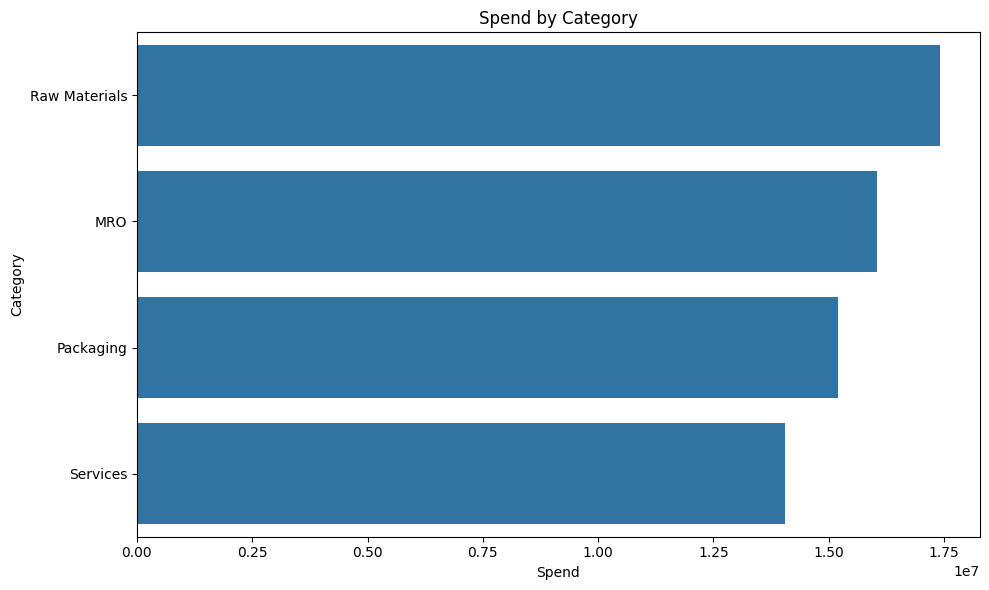

In [13]:
import seaborn as sns

# Spend by Category Bar Chart
plt.figure(figsize=(10,6))
sns.barplot(x=spend_by_category.values, y=spend_by_category.index)
plt.title('Spend by Category')
plt.xlabel('Spend')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

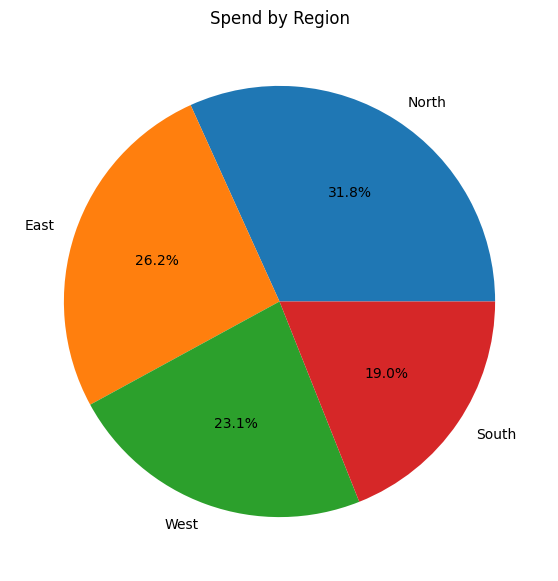

In [14]:
# Spend by Region Pie Chart
spend_by_region.plot.pie(autopct='%1.1f%%', figsize=(7,7), title='Spend by Region')
plt.ylabel('')
plt.show()
